# Exploratory Data Analytics

This assignment covers material from the first three lectures, with a focus on the following topics:

1. Data Visualization and Analysis
2. Linear Models for Regression and Classification
3. Support Vector Machines

In [139]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC

### **Part 1: Data Visualization and Analysis**

Understanding data characteristics and patterns is crucial for building effective models. In this part, we will visualize and analyze the `price.csv` dataset.

####**Diamond Dataset Description**

This dataset contains information on nearly 54,000 diamonds, including their prices and various attributes. It consists of 10 features, with 'price' as the target variable.

#####**Key Features:**

Carat: Diamond’s weight in metric carats.

Cut: Quality of the diamond’s cut (Fair, Good, Very Good, Premium, Ideal).

Color: Graded from J (worst) to D (best), representing the diamond’s colorlessness.

Clarity: Indicates inclusions/blemishes, from I1 (lowest) to IF (flawless).

Depth: Total depth percentage, representing the diamond’s height from the culet (bottom tip) to the table (top surface).

Table: Width of the diamond’s top (table) relative to its widest point.

x: Length in mm

y: Width in mm

z: Depth in mm

price: target variable


<b>Note: Remember to label plot axes while plotting.</b>

In [141]:
# Load the dataset

price_df = pd.read_csv('price.csv')
price_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [142]:
price_df['clarity'].value_counts()

,count
clarity,
SI1,13065
VS2,12258
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


**1.1 Create a bar chart to compare the average diamond prices by cut and color.**


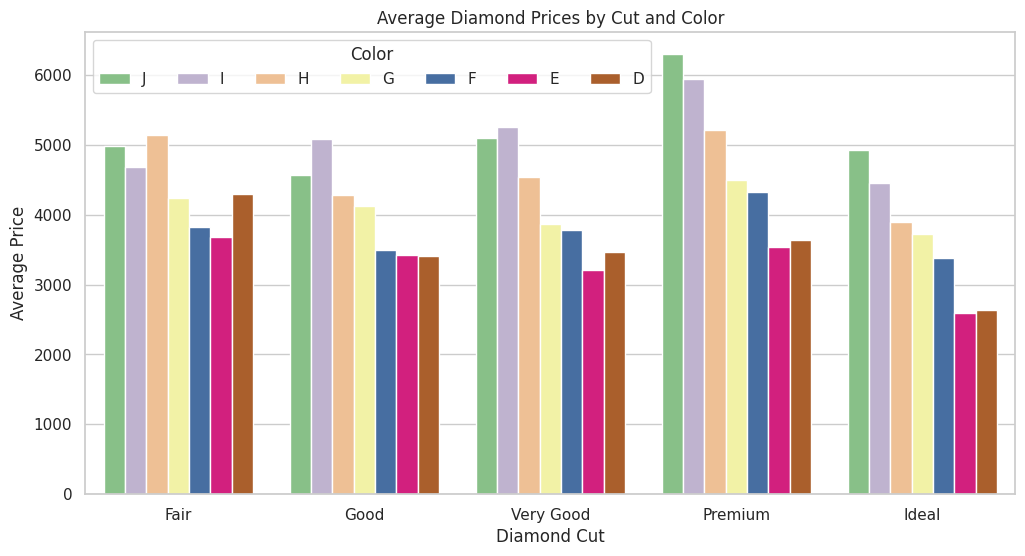

In [143]:
### Code here
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = list(set(price_df['color']))
color_order.sort(reverse=True)
avg_price_by_cut_color = price_df.groupby(['cut', 'color'])['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='cut', y='price', hue='color', data=avg_price_by_cut_color, order=cut_order, palette="Accent", hue_order=color_order)

plt.title('Average Diamond Prices by Cut and Color')
plt.xlabel('Diamond Cut')
plt.ylabel('Average Price')
plt.legend(title='Color', loc='upper left', ncol=8)
plt.grid(axis='x', visible=False)

plt.show()

### Comment here

From the above plot, we can infer that the overall average price all colors combined is the highest for the 'Premium' cut while the lowest for 'Ideal' cut. The diamonds with the highest average price have 'Premium' cut and are 'J' in color while the ones with the lowest average price have 'Ideal' cut and are 'E' in color.

**1.2 Plot a small multiple of bar charts to visualize the data distribution for the following categorical variables:**
1. **cut**
2. **color**

<ipython-input-144-f63b3e187820>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.catplot(x='cut', kind='count', data=price_df, aspect=1.5, palette='Set2', order=cut_order)


<Figure size 1200x600 with 0 Axes>

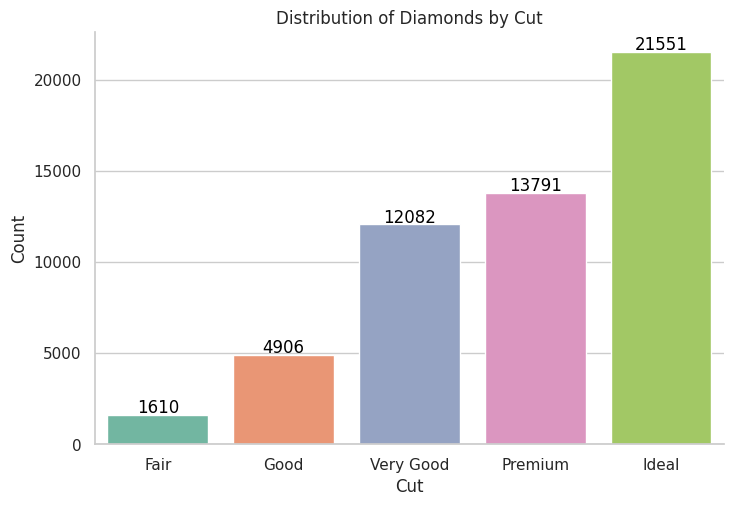

<ipython-input-144-f63b3e187820>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.catplot(x='color', kind='count', data=price_df, aspect=1.5, palette='Set2', order = color_order)


<Figure size 1200x600 with 0 Axes>

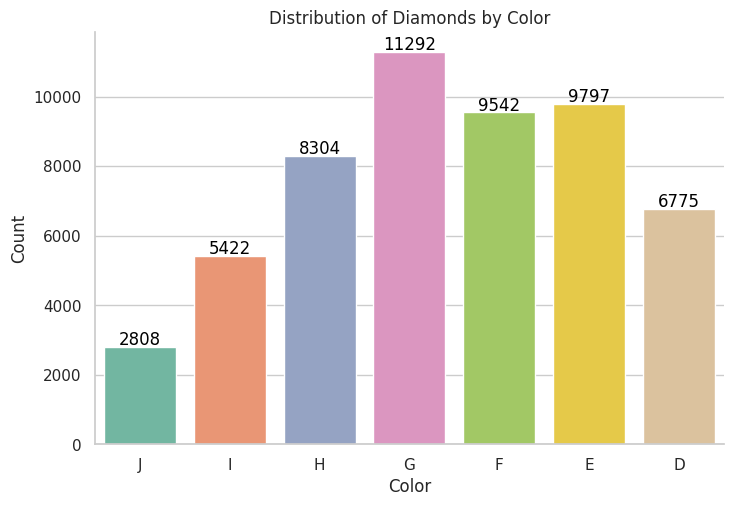

In [144]:
### Code here
sns.set(style="whitegrid")

# Plot small multiples for the 'cut' variable
plt.figure(figsize=(12, 6))
g=sns.catplot(x='cut', kind='count', data=price_df, aspect=1.5, palette='Set2', order=cut_order)
plt.title('Distribution of Diamonds by Cut')
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    fontsize=12, color='black',
                    xytext=(0, 5), textcoords='offset points')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.show()

# Plot small multiples for the 'color' variable
plt.figure(figsize=(12, 6))
g=sns.catplot(x='color', kind='count', data=price_df, aspect=1.5, palette='Set2', order = color_order)
plt.title('Distribution of Diamonds by Color')
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    fontsize=12, color='black',
                    xytext=(0, 5), textcoords='offset points')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

**1.3 Plot relationships between features (x,y,table,depth) and the target variable `price` as a small multiple of scatter plots.**
1. x length
2. y length
3. table
4. depth
<b></b>

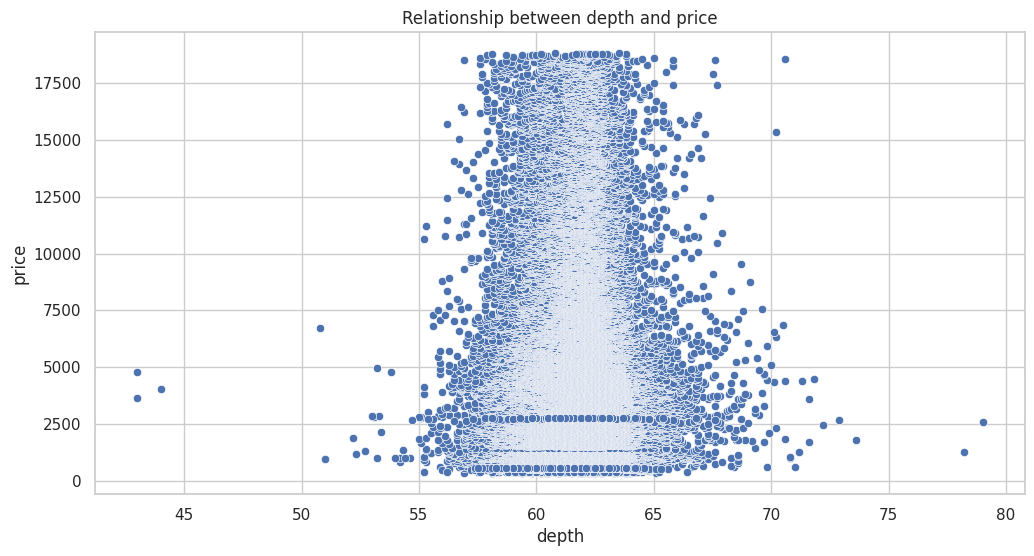

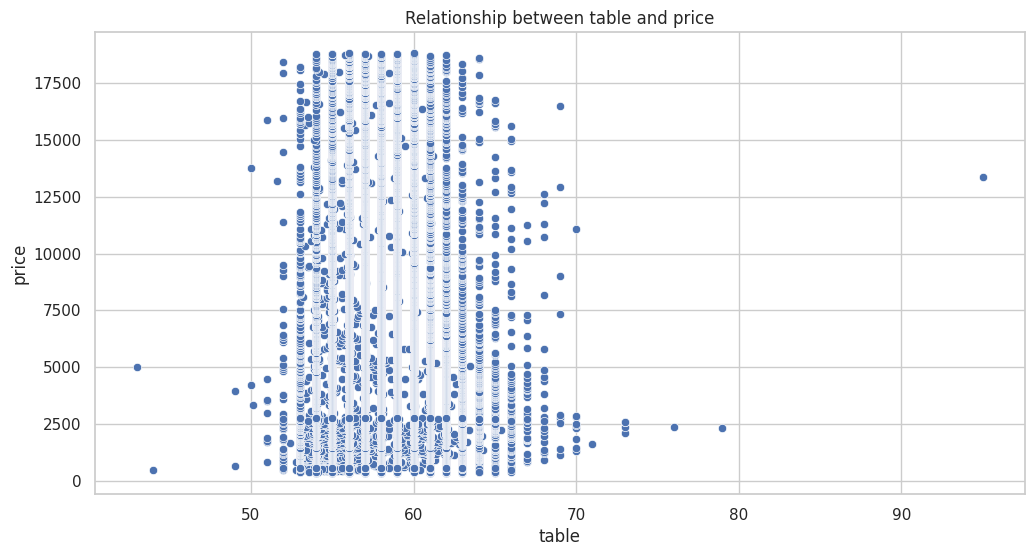

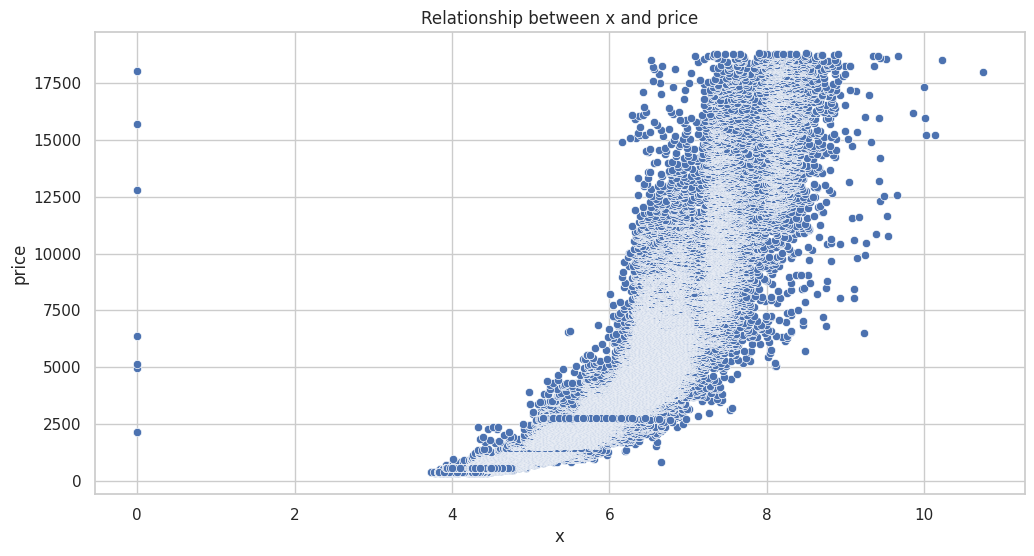

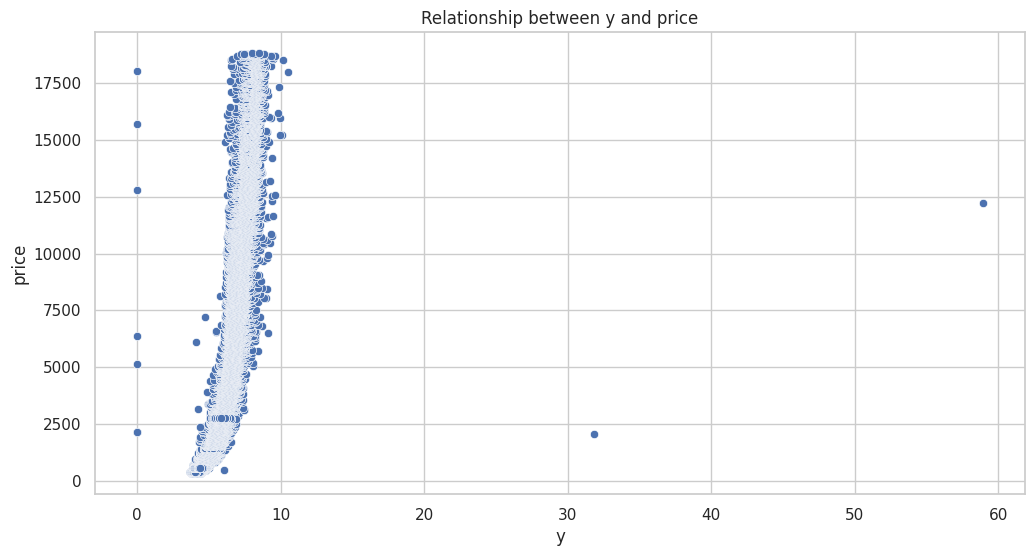

In [145]:
### Code here
plt.figure(figsize=(12, 6))
sns.scatterplot( x='depth', y='price', data=price_df)
plt.xlabel("depth")
plt.ylabel("price")
plt.title("Relationship between depth and price")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot( x='table', y='price', data=price_df)
plt.xlabel("table")
plt.ylabel("price")
plt.title("Relationship between table and price")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot( x='x', y='price', data=price_df)
plt.xlabel("x")
plt.ylabel("price")
plt.title("Relationship between x and price")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot( x='y', y='price', data=price_df)
plt.xlabel("y")
plt.ylabel("price")
plt.title("Relationship between y and price")
plt.show()

In [146]:
price_df[['x','y','table','depth','price']].corr()

,x,y,table,depth,price
x,1.000000,0.974701,0.195344,-0.025289,0.884435
y,0.974701,1.000000,0.183760,-0.029341,0.865421
table,0.195344,0.183760,1.000000,-0.295779,0.127134
depth,-0.025289,-0.029341,-0.295779,1.000000,-0.010647
price,0.884435,0.865421,0.127134,-0.010647,1.000000


**1.4 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.**


### Comment here
From the above scatter plots, it can be observed that only x and y seems to have a relationship with price (positive). depth and table show very slight to no relationship with price, there's no clear linearity between them and price. Also, there are categorical variables too which might not work best for linear regression. Therefore, I believe Linear regression is not a good model for this problem. Moreover, depth and table seems to show signs of heteroscedasticity.

## **Part 2: Linear Models for Regression and Classification**

In this section, we'll explore linear models, starting with **linear regression**.

**2.1 Linear Regression**

We will now proceed with splitting the dataset and implementing linear regression to predict the `price`.


In [147]:
# Split the dataset into features and labels

#price_X = price_df.drop(columns=['price'])
#price_y = price_df['price']

### **Data Preprocessing**

Before we can fit a linear regression model, several pre-processing steps should be applied to the dataset:

1. **Encode categorical features appropriately** (e.g., `cut`, `color`, `clarity`).
2. **Check for multicollinearity** by analyzing the correlation matrix and removing any highly collinear features.
3. **Split the dataset** into training (60%), validation (20%), and test (20%) sets.
4. **Standardize the feature matrices** (`X_train`, `X_val`, and `X_test`) to have zero mean and unit variance. Ensure that the standardization parameters (mean, variance) are learned from `X_train` and then applied to all sets to avoid information leakage.
5. **Add a column of ones** to `X_train`, `X_val`, and `X_test` for learning the bias term in the linear model.


**2.1.1 Encode the categorical variables of the Insurance dataset.**

In [148]:
### Code here
enc=OrdinalEncoder(categories=[['Fair','Good','Very Good','Premium', 'Ideal']])
price_df['cut']=enc.fit_transform(price_df['cut'].to_numpy().reshape(-1,1))
price_df['cut'].value_counts()

,count
cut,
4.0,21551
3.0,13791
2.0,12082
1.0,4906
0.0,1610


In [149]:
### Code here
enc=OrdinalEncoder(categories=[color_order])
price_df['color']=enc.fit_transform(price_df['color'].to_numpy().reshape(-1,1))
price_df['color'].value_counts()

,count
color,
3.0,11292
5.0,9797
4.0,9542
2.0,8304
6.0,6775
1.0,5422
0.0,2808


In [150]:
### Code here
enc=OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
price_df['clarity']=enc.fit_transform(price_df['clarity'].to_numpy().reshape(-1,1))
price_df['clarity'].value_counts()

,count
clarity,
2.0,13065
3.0,12258
1.0,9194
4.0,8171
5.0,5066
6.0,3655
7.0,1790
0.0,741


**2.1.2 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >= 0.9). If yes, drop one from each pair of highly correlated features from the dataframe. Either ways, why is this necessary before proceeding further?**

Text(0.5, 1.0, 'Correlation Matrix')

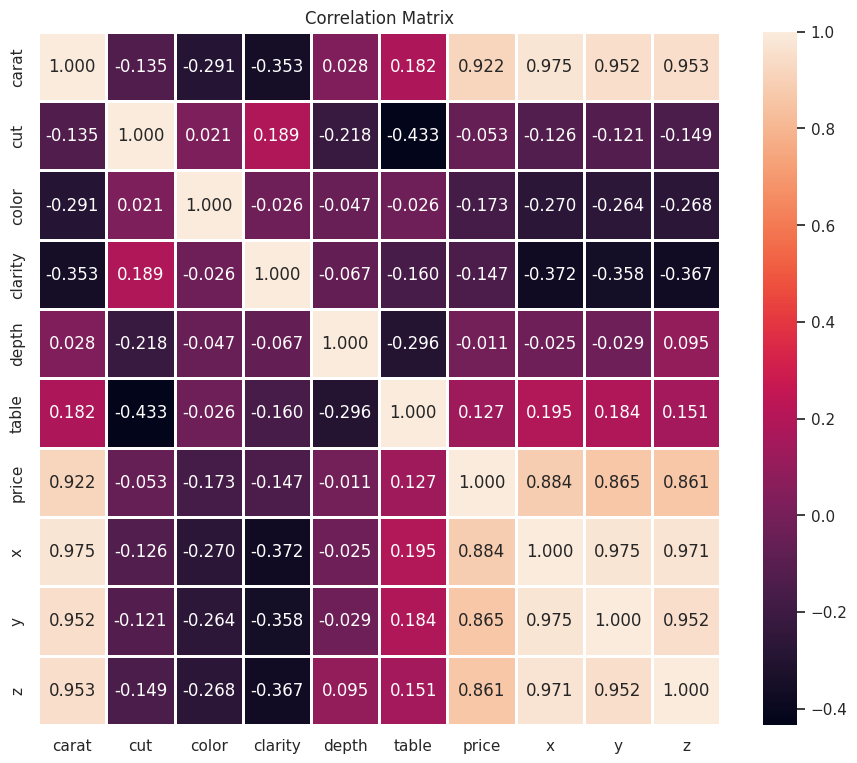

In [151]:
### Code here
plt.figure(figsize=(11,9))
sns.heatmap(price_df.corr(), annot=True, fmt='.3f',linewidths=1)
plt.title('Correlation Matrix')

In [152]:
### Code here
price_df=price_df.drop(['x','y','z'], axis=1)
price_df

,carat,cut,color,clarity,depth,table,price
0,0.23,4.0,5.0,1.0,61.5,55.0,326
1,0.21,3.0,5.0,2.0,59.8,61.0,326
2,0.23,1.0,5.0,4.0,56.9,65.0,327
3,0.29,3.0,1.0,3.0,62.4,58.0,334
4,0.31,1.0,0.0,1.0,63.3,58.0,335
...,...,...,...,...,...,...,...
53935,0.72,4.0,6.0,2.0,60.8,57.0,2757
53936,0.72,1.0,6.0,2.0,63.1,55.0,2757
53937,0.70,2.0,6.0,2.0,62.8,60.0,2757
53938,0.86,3.0,2.0,1.0,61.0,58.0,2757


### Comment here

'x', 'y' and 'z' are removed because of high correlation between them and 'carat'.


Multicollinearity in linear regression can make it difficult to determine the effect of each independent variable on the dependent variable. This can lead to unreliable models. It increases the variance of the regression coefficient estimates. This makes the estimates unstable and sensitive to small changes in the data. The increase in variance increases the standard error of the regression coefficient. This can lead to wide confidence intervals. The increase in standard errors can lead to insignificant p-values, even when the variables are important.
It can cause the coefficients to be poorly estimated or inflated. As a result, Multicollinearity can make the regression estimates vague, imprecise, and unreliable. Thus Multicollinearity between independent features shouldn't exist and should be removed.

**2.1.3 Split the dataset into training (60%), validation (20%), and test (20%) sets. Print the dimensions of the datasets as well.**

In [153]:
### Code here
X=price_df.drop('price', axis=1)
y=price_df['price']

price_X_train, price_X, price_y_train, price_y = train_test_split(X, y, test_size=0.4, random_state=42)

price_X_test, price_X_val, price_y_test, price_y_val = train_test_split(price_X, price_y, test_size=0.5, random_state=42)

print("Dimensions:")
print("price_X_train: ", price_X_train.shape)

print("price_X_val: ", price_X_val.shape)

print("price_X_test: ", price_X_test.shape)

print("price_y_train: ", price_y_train.shape)

print("price_y_val: ", price_y_val.shape)

print("price_y_test: ", price_y_test.shape)

Dimensions:
price_X_train:  (32364, 6)
price_X_val:  (10788, 6)
price_X_test:  (10788, 6)
price_y_train:  (32364,)
price_y_val:  (10788,)
price_y_test:  (10788,)


**2.1.4 Standardize the columns in the feature matrices.**

In [154]:
### Code here
ss=StandardScaler()
price_X_train=ss.fit_transform(price_X_train)
price_X_val=ss.transform(price_X_val)
price_X_test=ss.transform(price_X_test)

In [155]:
# Uncomment the following lines to add a column of ones to include the bias term

price_X_train = np.hstack([np.ones((price_X_train.shape[0], 1)), price_X_train])
price_X_val = np.hstack([np.ones((price_X_val.shape[0], 1)), price_X_val])
price_X_test = np.hstack([np.ones((price_X_test.shape[0], 1)), price_X_test])
price_X_test

array([[ 1.        , -0.16521497,  0.98600239, ..., -0.63904629,
        -0.38141465, -0.6601096 ],
       [ 1.        , -0.0598874 , -0.80554159, ..., -0.03110702,
         0.87583578,  0.23971001],
       [ 1.        ,  0.48781596,  0.0902304 , ..., -0.03110702,
         0.38690505, -0.21019979],
       ...,
       [ 1.        , -0.03882189, -0.80554159, ..., -0.63904629,
         0.52659955,  0.23971001],
       [ 1.        , -1.00783553,  0.98600239, ...,  1.79271081,
        -0.10202567, -1.1100194 ],
       [ 1.        ,  1.37256755, -2.59708558, ..., -1.24698557,
        -2.19744305,  4.73880803]])

At the end of this pre-processing, you should have the following vectors and matrices:

- **price_X_train**: Training set feature matrix.
- **price_X_val**: Validation set feature matrix.
- **price_X_test**: Test set feature matrix.
- **price_y_train**: Training set labels (prices).
- **price_y_val**: Validation set labels.
- **price_y_test**: Test set labels.


### Implement Linear Regression

Now that the data is preprocessed, we can implement a linear regression model, specifically Ridge Regression, which incorporates L2 regularization.

Given a feature matrix \( X \), a label vector \( y \), and a weight vector \( w \), the hypothesis function for linear regression is:

$$
y = X w
$$

The objective is to find the optimal weight vector \( w \) that minimizes the following loss function:



$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

Where:
-  $\| X w - y \|^2_2$ penalizes predictions that differ from actual labels.
- $\alpha \| w \|^2_2$ is the regularization term, helping reduce overfitting by penalizing large weights.
-  $\alpha$ is the regularization parameter.

The closed-form solution for Ridge Regression is given by the Normal Equations:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$



**2.1.5 Implement a `LinearRegression` class with `train` and `predict` methods**

We will now implement a custom `LinearRegression` class with L2 regularization (Ridge Regression).

**Note: You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [156]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution.
        Parameters:
        X : (m x n) feature matrix
        y: (m x 1) label vector
        '''
        ### Your code here
        n_features = X.shape[1]
        I = np.identity(n_features)

        X_transpose = X.T
        self.w = np.linalg.solve(X_transpose @ X + self.alpha * I, X_transpose @ y)

    def predict(self, X):
        '''Predicts on X using trained model.
        Parameters:
        X : (m x n) feature matrix
        Returns:
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        return X @ self.w

**2.1.6 Train, Evaluate, and Interpret Linear Regression Model**

**Train a linear regression model ($\alpha = 0$) on the price dataset. Make predictions and report the $R^2$ score on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.**


In [157]:
def get_report(y_pred, y_test):
    """
    Report the first 3 and last 3 predictions on X_test,
    along with the actual labels in y_test.

    Returns:
        A dataframe with 6 rows comparing predictions and actuals.
    """
    preds = np.concatenate([y_pred[:3], y_pred[-3:]])
    actuals = np.concatenate([y_test[:3], y_test[-3:]])
    df_compare = pd.DataFrame({'Prediction': preds, 'Actual': actuals})
    df_compare['Position'] = [1, 2, 3, len(y_pred) - 2, len(y_pred) - 1, len(y_pred)]
    df_compare = df_compare.set_index('Position')
    return df_compare

In [158]:
### Code here
model = LinearRegression(alpha=0)

model.train(price_X_train, price_y_train)

train_preds = model.predict(price_X_train)
val_preds = model.predict(price_X_val)
test_preds = model.predict(price_X_test)

In [159]:
def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    return 1 - (ss_residual / ss_total)

train_r2 = r2_score(price_y_train, train_preds)
val_r2 = r2_score(price_y_val, val_preds)
test_r2 = r2_score(price_y_test, test_preds)

print(f"R^2 on training set: {train_r2:.4f}")
print(f"R^2 on validation set: {val_r2:.4f}")
print(f"R^2 on test set: {test_r2:.4f}")

R^2 on training set: 0.9043
R^2 on validation set: 0.9070
R^2 on test set: 0.9019


In [160]:
get_report(test_preds, price_y_test)

,Prediction,Actual
Position,,
1,3406.819899,2666
2,4313.438521,3351
3,5820.103190,6146
10786,3901.758760,3258
10787,1353.328752,814
10788,6998.858277,4570


**2.1.7 Use the mean of the training labels (price_y_train) as the prediction for all instances. Report the $R^2$ on the training, validation, and test sets using this baseline.**

>This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression $R^2$ should be much higher than these baseline $R^2$.

In [161]:
### Code here
mean_train_label = np.mean(price_y_train)

train_r2_baseline = r2_score(price_y_train, np.array([mean_train_label]*price_y_train.shape[0]))
val_r2_baseline = r2_score(price_y_val, np.array([mean_train_label]*price_y_val.shape[0]))
test_r2_baseline = r2_score(price_y_test, np.array([mean_train_label]*price_y_test.shape[0]))

print(f"R^2 on training set (baseline): {train_r2_baseline:.4f}")
print(f"R^2 on validation set (baseline): {val_r2_baseline:.4f}")
print(f"R^2 on test set (baseline): {test_r2_baseline:.4f}")

R^2 on training set (baseline): 0.0000
R^2 on validation set (baseline): -0.0000
R^2 on test set (baseline): -0.0000


**2.1.8 Interpret your model trained on the price dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

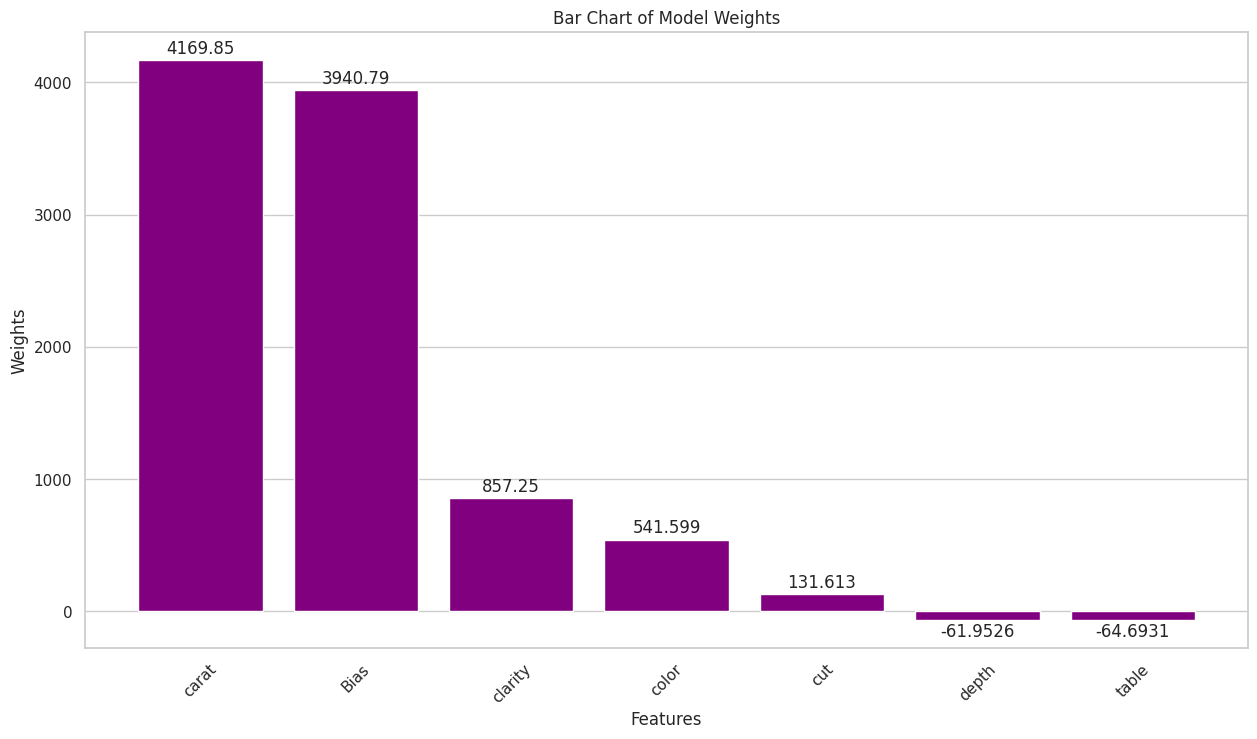

In [162]:
### Code here

feature_weights={}
weights = model.w.flatten()

feature_weights['Bias']=weights[0]

for i in range(price_X_train.shape[1] - 1):
  feature_weights[X.columns[i]]=weights[i+1]

feature_weights={k: v for k, v in sorted(feature_weights.items(), key=lambda item: item[1], reverse=True)}

plt.figure(figsize=(15, 8))
p=plt.bar(feature_weights.keys(), feature_weights.values(), color = 'purple')
plt.bar_label(p, padding=2)
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Bar Chart of Model Weights')
plt.xticks(rotation=45)
plt.grid(axis='x', visible=False)
plt.show()

**2.1.9 According to your model, which features are the greatest contributors to determine the price?**

### Comment here

From the above barplot, we can observe that the feature 'carat' is the greatest contributor followed by 'clarity'. 'depth' and 'table' don't contribute much to the model (also they are the only ones that contribute negatively to the model). Also bias plays a major role in the model which is actually next to carat.

**Hyperparameter Tuning ($\alpha$)**

Now, let's tune the $\alpha$ regularization parameter for ridge regression on the price dataset.

**2.1.10 Sweep out values for $\alpha$ using `alphas = np.logspace(-5, 1, 20)`. Perform a grid search over these $\alpha$ values, recording the training and validation $R^2$ for each $\alpha$. Plot the results with a log scale for $\alpha$.**

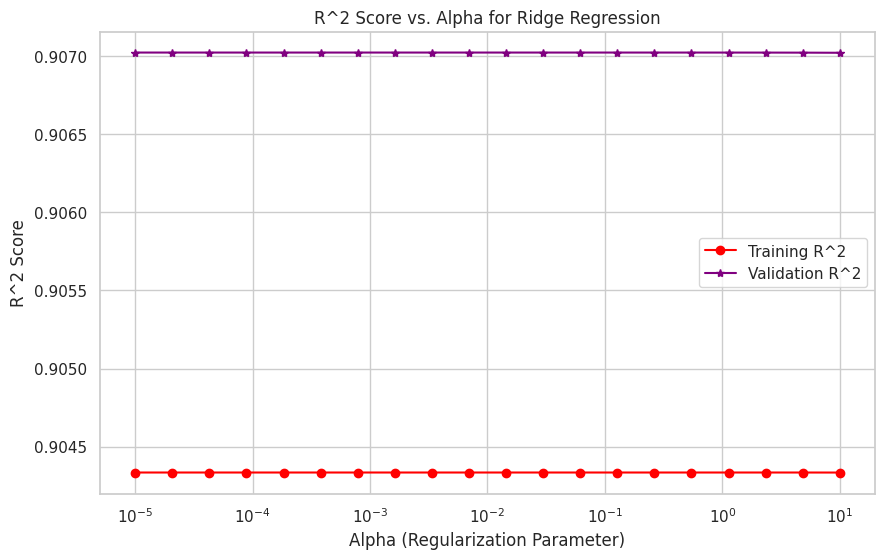

In [163]:
### Code here
alphas = np.logspace(-5, 1, 20)

train_r2_scores = []
val_r2_scores = []

for alpha in alphas:
    model = LinearRegression(alpha=alpha)

    model.train(price_X_train, price_y_train)

    train_preds = model.predict(price_X_train)
    val_preds = model.predict(price_X_val)

    train_r2 = r2_score(price_y_train, train_preds)
    val_r2 = r2_score(price_y_val, val_preds)

    train_r2_scores.append(train_r2)
    val_r2_scores.append(val_r2)

plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Training R^2', marker='o', color='red')
plt.plot(alphas, val_r2_scores, label='Validation R^2', marker='*', color='purple')

plt.xscale('log')
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs. Alpha for Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()

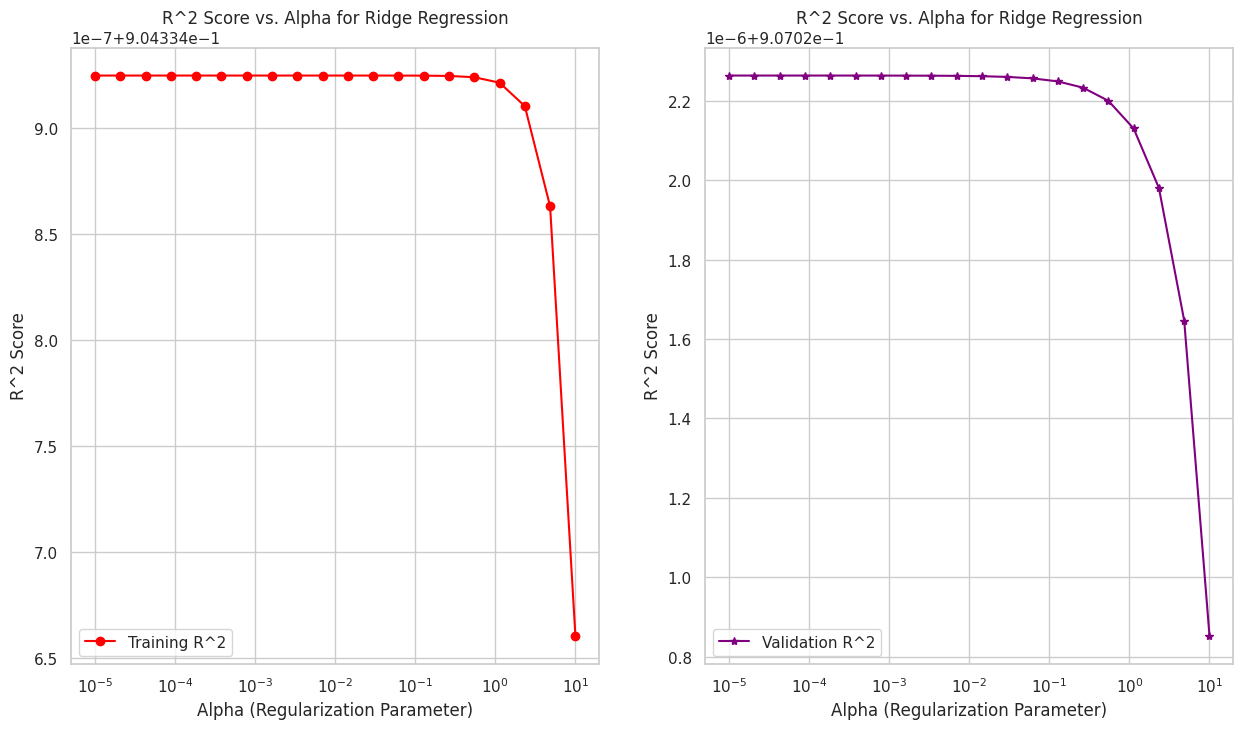

In [164]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(alphas, train_r2_scores, label='Training R^2', marker='o', color='red')

plt.xscale('log')
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs. Alpha for Ridge Regression')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(alphas, val_r2_scores, label='Validation R^2', marker='*', color='purple')

plt.xscale('log')
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs. Alpha for Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()

In [165]:
best_alpha_index = np.argmax(val_r2_scores)
best_alpha = alphas[best_alpha_index]
best_train_r2 = train_r2_scores[best_alpha_index]
best_val_r2 = val_r2_scores[best_alpha_index]

print(f"Best alpha: {best_alpha:.5f}")
print(f"Best training R^2: {best_train_r2:.4f}")
print(f"Best validation R^2: {best_val_r2:.4f}")

Best alpha: 0.00001
Best training R^2: 0.9043
Best validation R^2: 0.9070


**2.1.11 Explain your plot above. How do training and validation $R^2$ behave with increasing $\alpha$?**

### Comment here

From the graph, we can see that both training and validation $R^2$ values gradually decrease with increase in $\alpha$ but abruptly decrease by $10^{-7}$ for training $R^2$ and $10^{-6}$ for validation $R^2$ between $10^{0}$ and $10^{1}$

## 2.2 Logistic Regression

###**Social Network Ads Dataset Description**

This dataset contains information on user demographics and their purchasing behavior based on social network advertisements. It consists of 5 features, with Purchased (0 = No, 1 = Yes) as the target variable for classification tasks.

####**Key Features:**

User ID: Unique identifier for each user.

Gender: Gender of the user (Male, Female).

Age: Age of the user (ranging from 18 to 60).

EstimatedSalary: User’s estimated annual salary in USD (ranging from 15,000 to 150,000).

Purchased: Indicates whether the user made a purchase after seeing an ad (0 = No, 1 = Yes).

**2.2.1 Load the dataset, the dataset to be used is ads.csv**

In [166]:
### Code here
ads_df = pd.read_csv('ads.csv')
ads_df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [167]:
#Uncomment the following line

ads_df = ads_df.drop(columns=['User ID'])

**2.2.2 Are there any missing values in the dataset?**

In [168]:
### Code here
ads_df.isnull().sum()

,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


### Comment here

No, there are no missing values in the dataset.

**2.2.3 Encode the categorical variables. What is the best way to encode and why?**

In [169]:
### Code here
encoder = OneHotEncoder(sparse_output=False)

categorical_columns = ['Gender']

encoded_values = encoder.fit_transform(ads_df[categorical_columns])

encoded_df = pd.DataFrame(encoded_values, columns=encoder.get_feature_names_out(categorical_columns))

ads_df = pd.concat([ads_df.drop(columns=categorical_columns), encoded_df], axis=1)

ads_df

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0.0,1.0
1,35,20000,0,0.0,1.0
2,26,43000,0,1.0,0.0
3,27,57000,0,1.0,0.0
4,19,76000,0,0.0,1.0
...,...,...,...,...,...
395,46,41000,1,1.0,0.0
396,51,23000,1,0.0,1.0
397,50,20000,1,1.0,0.0
398,36,33000,0,0.0,1.0


According to me, for this problem, the best approach is to use One-Hot Encoding because the "Gender" feature (which is the only categorical feature) has two categories: "Male" and "Female". It's a nominal (non-ordinal) categorical variable, meaning there is no natural order or hierarchy between the two categories.

Ordinal encoding can't be used as there's no order or any relationship between the 2 categories.

Target encoding is not used because of low cardinality - only 2 categories 'Male' and 'Female'.

**2.2.4 Do you think that the distribution of labels is balanced? Why/why not? Hint: Find the probability of the different categories.**

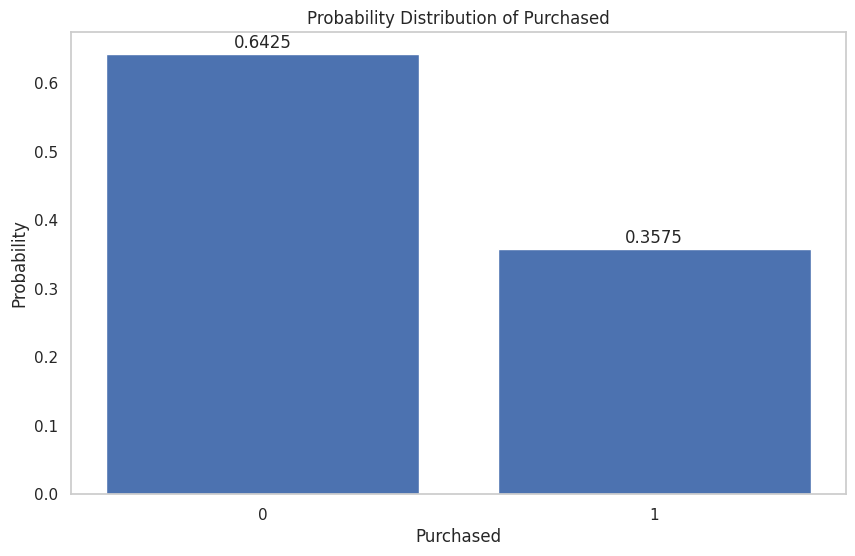

In [170]:
### Code here
p=[(ads_df['Purchased']==0).sum()/len(ads_df), (ads_df['Purchased']==1).sum()/len(ads_df)]
x= np.array(["0","1"])

plt.figure(figsize=(10, 6))
l=plt.bar(x, height=p)
plt.bar_label(l, padding=2)
plt.xlabel("Purchased")
plt.ylabel("Probability")
plt.title("Probability Distribution of Purchased")
plt.grid(visible=False)

### Comment here

No, they are not balanced. The probablity of purchased=0 is almost twice as that of purchased=1 as opposed to probablity of purchased=0 and purchased=1 being 0.5 (balanced distribution).

**2.2.5 Plot the correlation matrix (first separate features and Y variable), and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe.**

Text(0.5, 1.0, 'Correlation Matrix')

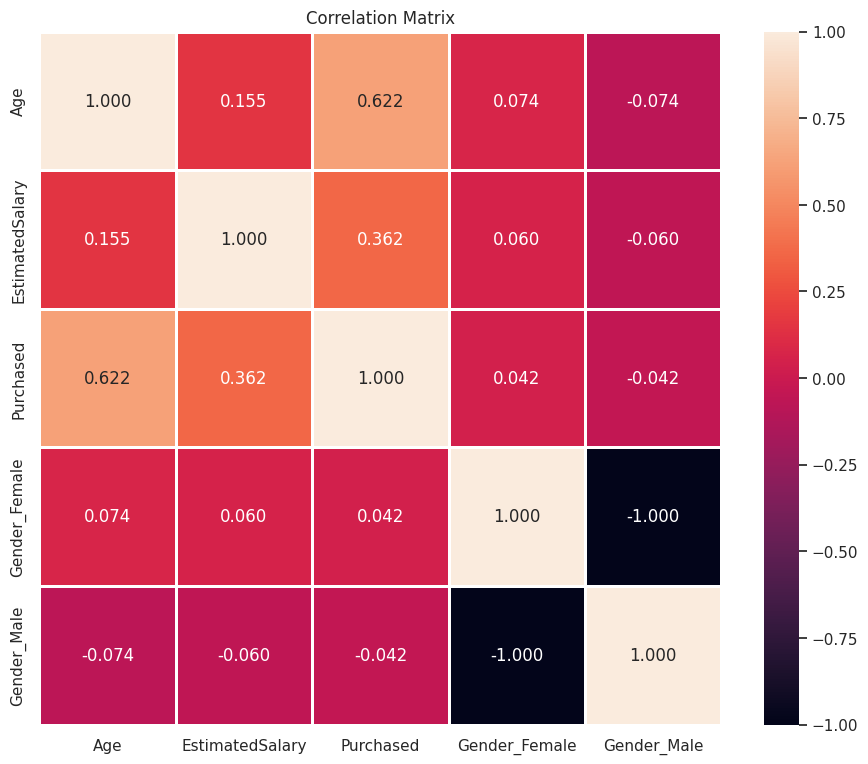

In [171]:
### Code here
plt.figure(figsize=(11,9))
sns.heatmap(ads_df.corr(), annot=True, fmt='.3f',linewidths=1)
plt.title('Correlation Matrix')

In [172]:
### Code here
ads_df.drop('Gender_Female', axis=1, inplace=True)
ads_df

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1.0
1,35,20000,0,1.0
2,26,43000,0,0.0
3,27,57000,0,0.0
4,19,76000,0,1.0
...,...,...,...,...
395,46,41000,1,0.0
396,51,23000,1,1.0
397,50,20000,1,0.0
398,36,33000,0,1.0


### Comment here

For the correlation plot we can see that the 'Gender' feature split into 2 features - 'Gender_Male' and 'Gender_Female' are the only 2 columns that are highly correlated (100%). So we remove either one of those, here I'm removing 'Gender_Female'.

**2.2.6 Apply the following pre-processing steps:**

1. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [173]:
### Code here
X=ads_df.drop('Purchased', axis=1)
y=ads_df['Purchased']

ads_X_train, ads_X, ads_y_train, ads_y = train_test_split(X, y, test_size=0.4, random_state=42)

ads_X_test, ads_X_val, ads_y_test, ads_y_val = train_test_split(ads_X, ads_y, test_size=0.5, random_state=42)

print("Dimensions:")
print("ads_X_train: ", ads_X_train.shape)

print("ads_X_val: ", ads_X_val.shape)

print("ads_X_test: ", ads_X_test.shape)

print("ads_y_train: ", ads_y_train.shape)

print("ads_y_val: ", ads_y_val.shape)

print("ads_y_test: ", ads_y_test.shape)

Dimensions:
ads_X_train:  (240, 3)
ads_X_val:  (80, 3)
ads_X_test:  (80, 3)
ads_y_train:  (240,)
ads_y_val:  (80,)
ads_y_test:  (80,)


In [174]:
ss=StandardScaler()
ads_X_train=ss.fit_transform(ads_X_train)
ads_X_val=ss.transform(ads_X_val)
ads_X_test=ss.transform(ads_X_test)

In [175]:
ads_X_train = np.hstack([np.ones((ads_X_train.shape[0], 1)), ads_X_train])
ads_X_val = np.hstack([np.ones((ads_X_val.shape[0], 1)), ads_X_val])
ads_X_test = np.hstack([np.ones((ads_X_test.shape[0], 1)), ads_X_test])

### Implement Logisitc Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
>
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [176]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''

    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent
        (sets w to its optimal value).

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''

        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t):
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss

    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold
        the predicted probability to return a 0 or 1 prediction.

        Parameters
        ----------
        X : (m x n) feature matrix

        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred

    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w,
        and alpha. Useful as a helper function for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2

    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss
        using X, y, w, and alpha. Useful as a helper function
        for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w


    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x.
        Useful as a helper function for predict(), calculate_loss(),
        and calculate_gradient().

        Parameters
        ----------
        x: (m x 1) vector

        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.7 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

i) Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the loan training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge.

ii) Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

iii) Compare accuracy on the test dataset for both the scenarios.

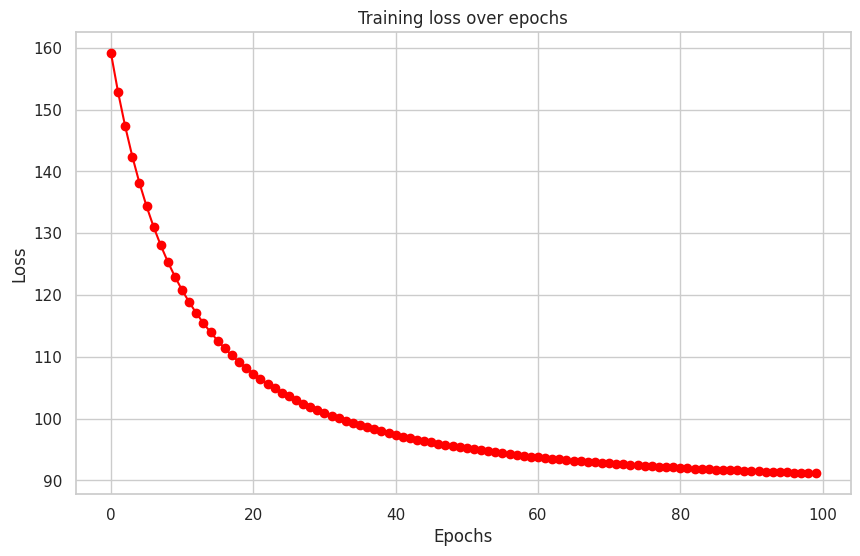

In [177]:
### Code here
ads_y_train=np.array(ads_y_train).reshape(-1,1)

model = LogisticRegression(alpha=0, t=100, eta=1e-3)

loss=model.train(ads_X_train, ads_y_train)

losses=[x[0] for x in loss]

plt.figure(figsize=(10,6))
plt.plot(range(0,100), losses, marker='o', color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training loss over epochs")
plt.show()

In [178]:
### Code here
import random

alpha_range = (0, 1)
eta_range = (0, 0.001)
t_range = (0, 100)

best_model = None
best_accuracy = 0
best_hyperparameters = {}

for _ in range(20):
    alpha = random.uniform(*alpha_range)
    eta = random.uniform(*eta_range)
    t = random.randint(*t_range)

    log_reg = LogisticRegression(alpha=alpha, t=t, eta=eta)

    log_reg.train(ads_X_train, ads_y_train)
    y_pred = log_reg.predict(ads_X_val)
    accuracy = np.mean(y_pred == np.array(ads_y_val).reshape(-1,1))

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = log_reg
        best_hyperparameters = {'alpha': alpha, 'eta': eta, 't': t}

print("Best Hyperparameters:", best_hyperparameters)
print("Best Accuracy on Validation Set:", best_accuracy)

Best Hyperparameters: {'alpha': 0.19763146615823146, 'eta': 0.00044725457877959154, 't': 23}
Best Accuracy on Validation Set: 0.8875


In [179]:
### Code here
y_pred_first=model.predict(ads_X_test)
accuracy_first = np.mean(y_pred_first == np.array(ads_y_test).reshape(-1,1))

model2=LogisticRegression(alpha=best_hyperparameters['alpha'], t=best_hyperparameters['t'], eta=best_hyperparameters['eta'])
model2.train(ads_X_train, ads_y_train)
y_pred_second=model2.predict(ads_X_test)
accuracy_second = np.mean(y_pred_second == np.array(ads_y_test).reshape(-1,1))

print("Accuracy of 1st model on test data ", accuracy_first)

print("Accuracy of hypertuned model on test data ", accuracy_second)

Accuracy of 1st model on test data  0.825
Accuracy of hypertuned model on test data  0.8125


### Feature Importance

**2.2.8 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

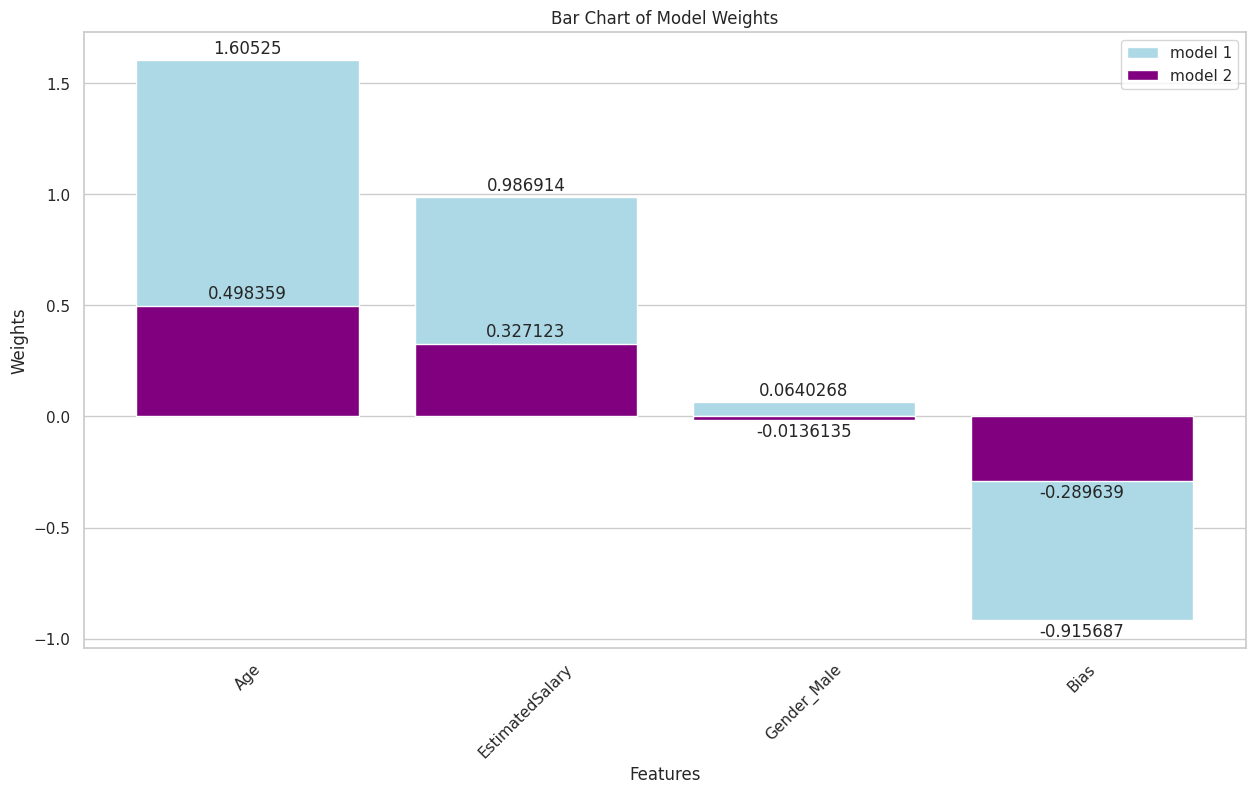

In [180]:
### Code here
feature_weights={}
weights = model.w.flatten()

feature_weights['Bias']=weights[0]

for i in range(ads_X_train.shape[1] - 1):
  feature_weights[X.columns[i]]=weights[i+1]

feature_weights={k: v for k, v in sorted(feature_weights.items(), key=lambda item: item[1], reverse=True)}

feature_weights2={}
weights2 = model2.w.flatten()

feature_weights2['Bias']=weights2[0]

for i in range(ads_X_train.shape[1] - 1):
  feature_weights2[X.columns[i]]=weights2[i+1]

feature_weights2={k: v for k, v in sorted(feature_weights2.items(), key=lambda item: item[1], reverse=True)}


plt.figure(figsize=(15, 8))
p=plt.bar(feature_weights.keys(), feature_weights.values(), color = 'lightblue')
plt.bar_label(p, padding=2)

#the same feature_weights.keys() is used for both barplots because I already
#verified that both the models have the same feature importance order.
p=plt.bar(feature_weights.keys(), feature_weights2.values(), color = 'purple')
plt.legend(["model 1","model 2"])

plt.bar_label(p, padding=2)
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Bar Chart of Model Weights')
plt.xticks(rotation=45)
plt.grid(axis='x', visible=False)
plt.show()

### Comment here

From the above barplot, we can see that both for model 1 (the original model) and model 2 (the hypertuned model), 'age' plays a major role, followed by 'estimated salary'. The 'bias' has a negative effect on the models and is almost as important as 'estimated salary'. 'Gender' contributes the least to the models.

### 2.3 Support Vector Machines

In this part, we will be using support vector machines for classification on the loan dataset.

### Train Primal SVM
**2.3.1 Train a primal SVM (with default parameters) on the ads dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [181]:
### Code here

svm_primal_model = LinearSVC(dual=False)

svm_primal_model.fit(ads_X_train, ads_y_train)

y_train_pred_primal = svm_primal_model.predict(ads_X_train)
y_val_pred_primal = svm_primal_model.predict(ads_X_val)
y_test_pred_primal = svm_primal_model.predict(ads_X_test)

train_accuracy_primal = np.mean(np.array(ads_y_train).flatten()==y_train_pred_primal)
val_accuracy_primal = np.mean(np.array(ads_y_val).flatten()== y_val_pred_primal)
test_accuracy_primal = np.mean(np.array(ads_y_test).flatten()== y_test_pred_primal)

print(f"Dual SVM Training Accuracy: {train_accuracy_primal * 100}%")
print(f"Dual SVM Validation Accuracy: {val_accuracy_primal * 100}%")
print(f"Dual SVM Test Accuracy: {test_accuracy_primal * 100}%")

Dual SVM Training Accuracy: 81.25%
Dual SVM Validation Accuracy: 87.5%
Dual SVM Test Accuracy: 82.5%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Train Dual SVM
**2.3.2 Train a dual SVM (with default parameters) on the ads dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [182]:
### Code here

svm_dual_model = LinearSVC(dual=True)

svm_dual_model.fit(ads_X_train, ads_y_train)

y_train_pred_dual = svm_dual_model.predict(ads_X_train)
y_val_pred_dual = svm_dual_model.predict(ads_X_val)
y_test_pred_dual = svm_dual_model.predict(ads_X_test)

train_accuracy_dual = np.mean(np.array(ads_y_train).flatten()==y_train_pred_dual)
val_accuracy_dual = np.mean(np.array(ads_y_val).flatten()== y_val_pred_dual)
test_accuracy_dual = np.mean(np.array(ads_y_test).flatten()== y_test_pred_dual)

print(f"Dual SVM Training Accuracy: {train_accuracy_dual * 100}%")
print(f"Dual SVM Validation Accuracy: {val_accuracy_dual * 100}%")
print(f"Dual SVM Test Accuracy: {test_accuracy_dual * 100}%")


Dual SVM Training Accuracy: 81.25%
Dual SVM Validation Accuracy: 87.5%
Dual SVM Test Accuracy: 82.5%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Comment here

From above, we can see that primal SVM and dual SVM works the same on all training, validation and test data. One reason why this could happen is when if the classes are perfectly linearly separable, where the choice of dual formulation might not significantly impact the result as the optimal hyperplane is well defined.